# **This code is to generate synthetic data from a source data using ML Methods**

## **This code uses the CTGAN**

In [1]:
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
sns.set(style="darkgrid", font_scale=1.2)

from google.colab import files
from datetime import datetime, date

In [2]:
#from google.colab import files
#data_to_load=files.upload()

from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [10]:
#pip install ctgan

In [4]:
# Load necessary libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from ctgan import CTGAN
import matplotlib.pyplot as plt
import seaborn as sns

# **STEP 1: Load Original Data**

In [34]:
# Import dataset
df=pd.read_excel('/content/gdrive/MyDrive/Colab Notebooks/diabetes_v1.xlsx')
# Overview of dataset
df.sample(3)

,Gender,Village,Glucose,BloodPressure,Insulin,BMI,Age,Outcome
301,H,Koila,144,58,135,31.6,25,1
560,H,Koila,125,76,0,33.8,54,1
436,F,Koila,140,85,0,37.4,41,0


# **STEP 2: Preprocess Data**

In [35]:
# Handle categorical columns by encoding them
categorical_cols = ['Gender', 'Village']
original_value_maps = {}  # Store mappings for inverse transformation
print("\n Handling Categorical columns done")

# Label encode categorical columns to numerical format for CTGAN
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))  # Ensure conversion to string
    original_value_maps[col] = le  # Store the LabelEncoder for future use
print("\n Label Encoding done")

### **Variables numériques gérées par CTGAN automatiquement**


 Handling Categorical columns done

 Label Encoding done


In [36]:
# Overview
df.sample(2)

,Gender,Village,Glucose,BloodPressure,Insulin,BMI,Age,Outcome
185,0,0,194,68,0,35.9,41,1
19,1,0,115,70,96,34.6,32,1


# **STEP 3: Fit the CTGAN Model**
##Initialize CTGAN model with specified epochs

In [38]:
ctgan = CTGAN(epochs=100, verbose=True)

# Train the model using the transformed original dataset
ctgan.fit(df)
print("\n Step 3 to fit the CTGAN model completed")

Gen. (-0.93) | Discrim. (0.41): 100%|██████████| 100/100 [00:07<00:00, 13.90it/s]


 Step 3 to fit the CTGAN model completed


# **STEP 4: Generate Synthetic Data**
##Generate a synthetic dataset with the same number of records as the original dataset

In [39]:
synthetic_data = ctgan.sample(len(df))

# **STEP 6: Assign values to synthetic sex values**
##Assign random binary values to maintain realism

In [33]:
df.sample(2)

In [40]:
synthetic_sex_numeric = np.random.choice([1, 2], size=len(synthetic_data))  # 1 for 'M', 2 for 'F'
synthetic_village_numeric = np.random.choice([1, 2], size=len(synthetic_data))  # 1 for 'Dangassa', 2 for 'Koila'
synthetic_data['Gender'] = synthetic_sex_numeric  # Temporarily store numeric values for Gender
synthetic_data['Village'] = synthetic_village_numeric  # Temporarily store numeric values for Village


# **STEP 7: Convert numeric back to values**


In [41]:
synthetic_data['Gender'] = synthetic_data['Gender'].replace({1: 'M', 2: 'F'})

synthetic_data['Village'] = synthetic_data['Village'].replace({1: 'Dangassa', 2: 'Koila'})

In [42]:
# Print the shape of the synthetic dataset
print(f'Synthetic Data Shape: {synthetic_data.shape[0]} rows, {synthetic_data.shape[1]} columns')

Synthetic Data Shape: 768 rows, 8 columns


In [43]:
synthetic_data.to_csv('synthetic_GAN_diabetes.csv', index=False)
print("\n Synthetic data saved successfully.")


 Synthetic data saved successfully.


# **STEP 9: Generate Graphical Comparisons**


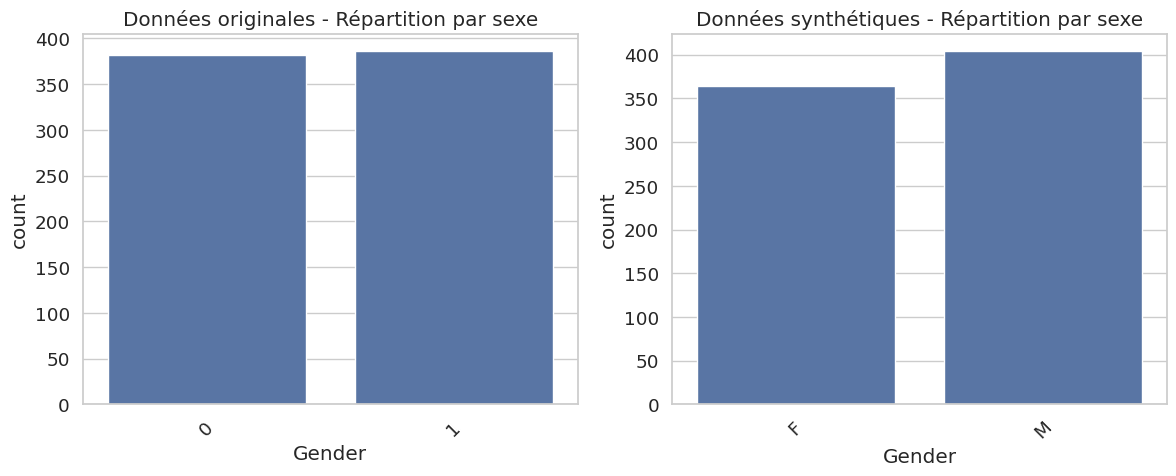

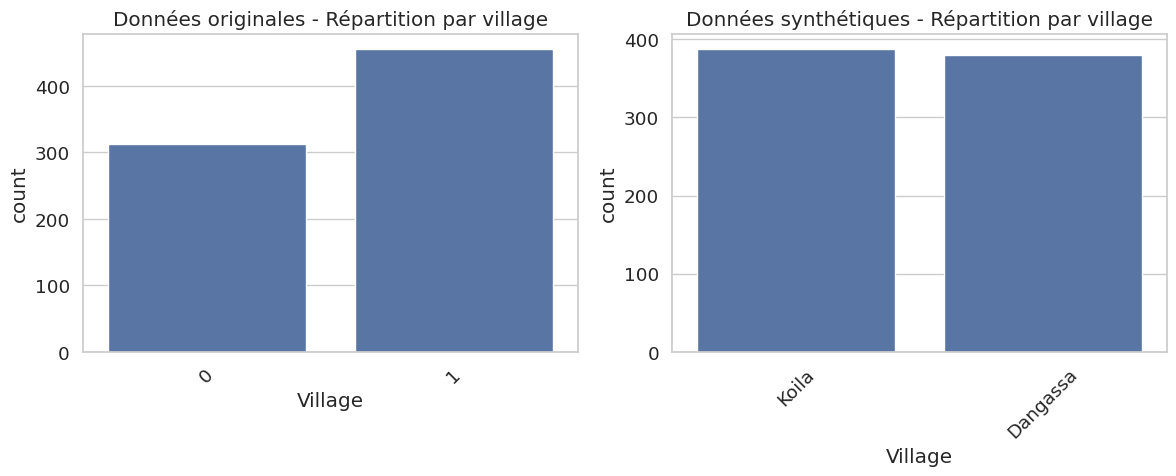

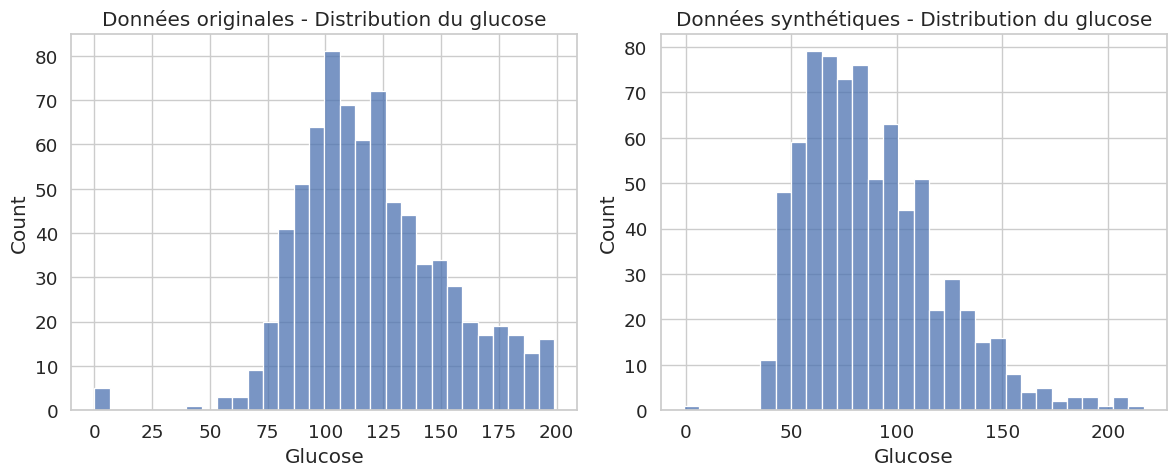

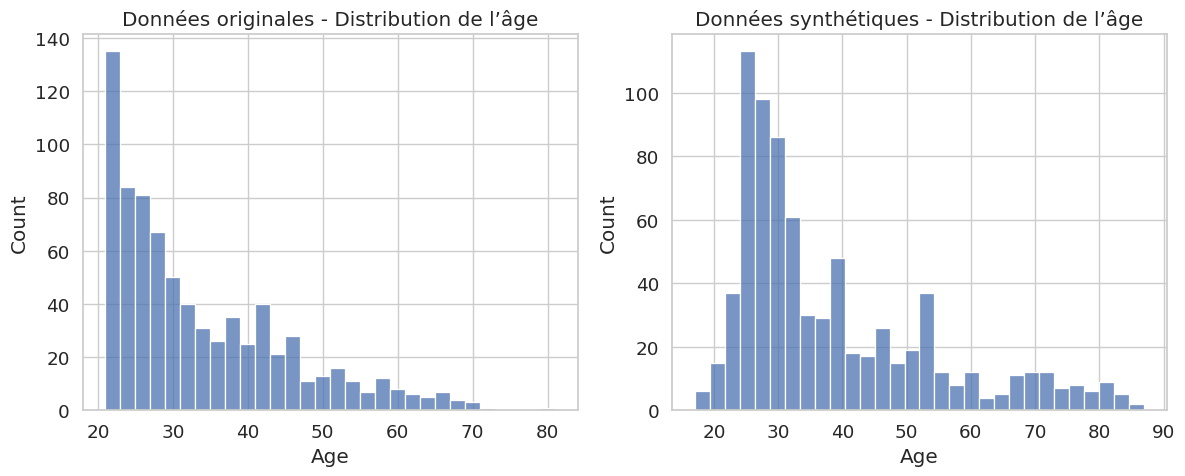

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

sns.set_style("whitegrid")

# Tu peux déclarer ici les colonnes que tu veux forcer en 'hist'
numeric_cols = ['Glucose', 'Age']

def plot_comparison(original, synthetic, column, title, kind=None):
    if column not in original.columns or column not in synthetic.columns:
        raise ValueError(f"La colonne '{column}' est absente des données.")

    # Déterminer le type de graphique si non spécifié
    if kind is None:
        kind = 'hist' if column in numeric_cols else 'bar'

    fig, axes = plt.subplots(1, 2, figsize=(12, 5))

    if kind == 'hist':
        sns.histplot(original[column], kde=False, ax=axes[0], bins=30)
        sns.histplot(synthetic[column], kde=False, ax=axes[1], bins=30)
    else:
        sns.countplot(x=original[column], ax=axes[0])
        sns.countplot(x=synthetic[column], ax=axes[1])

    axes[0].set_title(f'Données originales - {title}')
    axes[1].set_title(f'Données synthétiques - {title}')

    # Rotation des étiquettes de l'axe x pour les barplots
    if kind == 'bar':
        for ax in axes:
            ax.tick_params(axis='x', rotation=45)

    plt.tight_layout()
    plt.show()

plot_comparison(df, synthetic_data, 'Gender', 'Répartition par sexe')
plot_comparison(df, synthetic_data, 'Village', 'Répartition par village')
plot_comparison(df, synthetic_data, 'Glucose', 'Distribution du glucose')
plot_comparison(df, synthetic_data, 'Age', 'Distribution de l’âge')


# **STEP 10: Export Dataset**


In [45]:
from google.colab import files
synthetic_data.to_csv('synthetic_data.csv', index=False)
files.download('synthetic_data.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>